In [1]:
import re
import pandas as pd
import numpy as np
import joblib

In [8]:
# Dataset load (CSV)

dataset_path = './dataset/disaster.csv'
df = pd.read_csv(dataset_path)

df.head()

,0,1,2,3,4,5
0,5 Gempa Guncang Jatim Hari Ini,\-\n\nGempa di Jawa Timur terjadi 5 kali hari ...,0,0.0,0,0
1,"Kekeringan, 'Jokowi' Pun Ditanam di Dasar Sung...",\- Kemarau panjang membuat air Sungai Citarum ...,0,0.0,0,0
2,"Selain Terjang SPBU, Angin Kencang juga Rusak ...",\-\n\nAngin kencang yang merusak SPBU di Ambar...,0,1.0,15,0
3,Belasan Rumah dan 1 Merajan di Buleleng Rusak ...,\-\n\nHujan deras disertai dengan angin kencan...,0,0.0,18,1
4,"Gempa M 5,2 Guncang Bolsel Sulut, Tidak Berpot...","\-\n\nGempa bumi berkekuatan magnitudo (M) 5,2...",0,0.0,0,0


In [9]:
df = df.iloc[1: , :]
col_names = ['title','description', 'mati', 'luka', 'rumah', 'orang']
df.columns = col_names

df.head()

,title,description,mati,luka,rumah,orang
1,"Kekeringan, 'Jokowi' Pun Ditanam di Dasar Sung...",\- Kemarau panjang membuat air Sungai Citarum ...,0,0.0,0,0
2,"Selain Terjang SPBU, Angin Kencang juga Rusak ...",\-\n\nAngin kencang yang merusak SPBU di Ambar...,0,1.0,15,0
3,Belasan Rumah dan 1 Merajan di Buleleng Rusak ...,\-\n\nHujan deras disertai dengan angin kencan...,0,0.0,18,1
4,"Gempa M 5,2 Guncang Bolsel Sulut, Tidak Berpot...","\-\n\nGempa bumi berkekuatan magnitudo (M) 5,2...",0,0.0,0,0
5,"Longsor dan Pergerakan Tanah di Cianjur, Sawah...",\-\n\nLongsor dan pergerakan tanah terjadi di ...,0,0.0,6,31


In [10]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 1 to 1447
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1447 non-null   object 
 1   description  1447 non-null   object 
 2   mati         1447 non-null   object 
 3   luka         1447 non-null   float64
 4   rumah        1447 non-null   object 
 5   orang        1447 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.0+ KB


In [11]:
# df_rest = df.drop(['title', 'description'], axis=1)
df_rest = df
df_rest.head()

,title,description,mati,luka,rumah,orang
1,"Kekeringan, 'Jokowi' Pun Ditanam di Dasar Sung...",\- Kemarau panjang membuat air Sungai Citarum ...,0,0.0,0,0
2,"Selain Terjang SPBU, Angin Kencang juga Rusak ...",\-\n\nAngin kencang yang merusak SPBU di Ambar...,0,1.0,15,0
3,Belasan Rumah dan 1 Merajan di Buleleng Rusak ...,\-\n\nHujan deras disertai dengan angin kencan...,0,0.0,18,1
4,"Gempa M 5,2 Guncang Bolsel Sulut, Tidak Berpot...","\-\n\nGempa bumi berkekuatan magnitudo (M) 5,2...",0,0.0,0,0
5,"Longsor dan Pergerakan Tanah di Cianjur, Sawah...",\-\n\nLongsor dan pergerakan tanah terjadi di ...,0,0.0,6,31


In [12]:
# Data Cleansing
df_rest['mati'] = [re.sub("[^0-9]", "", str(mati)) if (re.sub("[^0-9]", "", str(mati)) != '') else 1 for mati in df_rest['mati']]
df['mati'] = df['mati'].astype(int)

df_rest['luka'] = [re.sub("[^0-9]", "", str(luka)) if (re.sub("[^0-9]", "", str(luka)) != '') else 1 for luka in df_rest['luka']]
df['luka'] = df['luka'].astype(int)

df_rest['rumah'] = [re.sub("[^0-9]", "", str(rumah)) if (re.sub("[^0-9]", "", str(rumah)) != '') else 1 for rumah in df_rest['rumah']]
df['rumah'] = df['rumah'].astype(int)

df_rest['orang'] = [re.sub("[^0-9]", "", str(orang)) if (re.sub("[^0-9]", "", str(orang)) != '') else 1 for orang in df_rest['orang']]
df['orang'] = df['orang'].astype(int)
# df_rest = df_rest.replace({',': '.'}, regex=True)

df_rest.head()
# df_rest.to_csv('coba.csv')
# df_rest.to_excel('coba.xlsx', index=None)

,title,description,mati,luka,rumah,orang
1,"Kekeringan, 'Jokowi' Pun Ditanam di Dasar Sung...",\- Kemarau panjang membuat air Sungai Citarum ...,0,0,0,0
2,"Selain Terjang SPBU, Angin Kencang juga Rusak ...",\-\n\nAngin kencang yang merusak SPBU di Ambar...,0,10,15,0
3,Belasan Rumah dan 1 Merajan di Buleleng Rusak ...,\-\n\nHujan deras disertai dengan angin kencan...,0,0,18,1
4,"Gempa M 5,2 Guncang Bolsel Sulut, Tidak Berpot...","\-\n\nGempa bumi berkekuatan magnitudo (M) 5,2...",0,0,0,0
5,"Longsor dan Pergerakan Tanah di Cianjur, Sawah...",\-\n\nLongsor dan pergerakan tanah terjadi di ...,0,0,6,31


In [13]:
def matiScale(matiCount: int) -> int:
  if matiCount < 3:
    return 1
  elif matiCount >= 3 and matiCount < 15:
    return 2
  return 3

def lukaScale(lukaCount: int) -> int:
  if lukaCount < 10:
    return 1
  elif lukaCount >= 10 and lukaCount < 20:
    return 2
  return 3

def rumahScale(rumahCount: int) -> int:
  if rumahCount < 4:
    return 1
  elif rumahCount >= 4 and rumahCount <= 20:
    return 2
  return 3

def orangScale(orangCount: int) -> int:
  if orangCount < 10:
    return 1
  elif orangCount >= 10 and orangCount <= 100:
    return 2
  return 3

def calculate(mati: int, luka: int, rumah: int, orang: int):
  subtractor = 0
  total = 0
  fiturCount = 4

  if (mati > 0):
    total += matiScale(matiCount=mati)
  else:
    subtractor += 1

  if (luka > 0):
    total += lukaScale(lukaCount=luka)
  else:
    subtractor += 1

  if (rumah > 0):
    total += rumahScale(rumahCount=rumah)
  else:
    subtractor += 1
  
  if (orang > 0):
    total += orangScale(orangCount=orang)
  else:
    subtractor += 1
          

  divider = (fiturCount - subtractor)
  severityMean = 0

  if (divider > 0):
    severityMean = total / divider

  if severityMean <= 1:
    return 'rendah'
  elif severityMean > 1 and severityMean <= 2:
    return 'sedang'
  else:
    return 'parah'

In [14]:
keparahanValues = []

for index, row in df_rest.iterrows():
  result = calculate(orang=int(row['orang']), \
      luka=int(row['luka']), \
        rumah=int(row['rumah']), \
          mati=int(row['mati']))
  
  keparahanValues.append(result)

In [15]:
df_rest['keparahan'] = keparahanValues
df_rest.head()

,title,description,mati,luka,rumah,orang,keparahan
1,"Kekeringan, 'Jokowi' Pun Ditanam di Dasar Sung...",\- Kemarau panjang membuat air Sungai Citarum ...,0,0,0,0,rendah
2,"Selain Terjang SPBU, Angin Kencang juga Rusak ...",\-\n\nAngin kencang yang merusak SPBU di Ambar...,0,10,15,0,sedang
3,Belasan Rumah dan 1 Merajan di Buleleng Rusak ...,\-\n\nHujan deras disertai dengan angin kencan...,0,0,18,1,sedang
4,"Gempa M 5,2 Guncang Bolsel Sulut, Tidak Berpot...","\-\n\nGempa bumi berkekuatan magnitudo (M) 5,2...",0,0,0,0,rendah
5,"Longsor dan Pergerakan Tanah di Cianjur, Sawah...",\-\n\nLongsor dan pergerakan tanah terjadi di ...,0,0,6,31,sedang


In [16]:
df_rest.to_csv('./dataset/hasil_keparahan.csv', index=False)
# df_rest.to_excel('hasil_keparahan.xlsx')

In [17]:
# Dataset load
dataset_path = './dataset/hasil_keparahan.csv'
df = pd.read_csv(dataset_path)

df.head()

,title,description,mati,luka,rumah,orang,keparahan
0,"Kekeringan, 'Jokowi' Pun Ditanam di Dasar Sung...",\- Kemarau panjang membuat air Sungai Citarum ...,0,0,0,0,rendah
1,"Selain Terjang SPBU, Angin Kencang juga Rusak ...",\-\n\nAngin kencang yang merusak SPBU di Ambar...,0,10,15,0,sedang
2,Belasan Rumah dan 1 Merajan di Buleleng Rusak ...,\-\n\nHujan deras disertai dengan angin kencan...,0,0,18,1,sedang
3,"Gempa M 5,2 Guncang Bolsel Sulut, Tidak Berpot...","\-\n\nGempa bumi berkekuatan magnitudo (M) 5,2...",0,0,0,0,rendah
4,"Longsor dan Pergerakan Tanah di Cianjur, Sawah...",\-\n\nLongsor dan pergerakan tanah terjadi di ...,0,0,6,31,sedang


In [18]:
df_rest = df.drop(['title', 'description'], axis=1)
df_rest.head()

,mati,luka,rumah,orang,keparahan
0,0,0,0,0,rendah
1,0,10,15,0,sedang
2,0,0,18,1,sedang
3,0,0,0,0,rendah
4,0,0,6,31,sedang


In [7]:
# Declare feature vector and target variable
X = df_rest.drop(['keparahan'], axis=1)
y = df_rest['keparahan']

In [19]:
X.describe()

,mati,luka,rumah,orang
count,1447.000000,1447.000000,1447.000000,1447.000000
mean,1.873531,89.246026,113.234969,206.154112
std,22.840445,2641.820933,2852.496117,3188.113715
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,443.000000,100000.000000,103539.000000,99559.000000


In [20]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [34]:
len(X_train)

1302

In [35]:
len(X_test)

145

In [29]:
X_train

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [7]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((1012, 4), (435, 4))

In [22]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Create model
from sklearn.naive_bayes import GaussianNB
## Instantiate the model
gnb = GaussianNB()

## Fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [12]:
joblib.dump(gnb, "model/naive_bayes.pkl")

['model/naive_bayes.pkl']

In [37]:
y_pred = gnb.predict(X_test)

y_pred

array(['sedang', 'rendah', 'sedang', 'rendah', 'rendah', 'sedang',
       'sedang', 'rendah', 'sedang', 'rendah', 'rendah', 'rendah',
       'sedang', 'sedang', 'rendah', 'rendah', 'rendah', 'rendah',
       'rendah', 'sedang', 'rendah', 'rendah', 'rendah', 'rendah',
       'rendah', 'rendah', 'rendah', 'rendah', 'parah', 'rendah',
       'sedang', 'sedang', 'rendah', 'sedang', 'rendah', 'rendah',
       'sedang', 'rendah', 'rendah', 'sedang', 'rendah', 'rendah',
       'sedang', 'rendah', 'sedang', 'sedang', 'sedang', 'sedang',
       'rendah', 'rendah', 'sedang', 'rendah', 'sedang', 'sedang',
       'rendah', 'rendah', 'rendah', 'rendah', 'rendah', 'sedang',
       'rendah', 'sedang', 'rendah', 'rendah', 'rendah', 'parah',
       'sedang', 'rendah', 'rendah', 'rendah', 'rendah', 'rendah',
       'rendah', 'rendah', 'sedang', 'rendah', 'rendah', 'rendah',
       'rendah', 'rendah', 'rendah', 'sedang', 'rendah', 'rendah',
       'rendah', 'sedang', 'sedang', 'rendah', 'rendah', 'rendah

In [38]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9310


In [12]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['rendah', 'rendah', 'rendah', ..., 'sedang', 'rendah', 'rendah'],
      dtype='<U6')

In [24]:
# Print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9201
Test set score: 0.9310


In [25]:
# Check class distribution in test set
print("y_test: Class")
y_test.value_counts()

y_test: Class


rendah    95
sedang    43
parah      7
Name: keparahan, dtype: int64

In [384]:
print("y_train: Class")
y_train.value_counts()

y_train: Class


rendah    685
sedang    252
parah      75
Name: keparahan, dtype: int64

In [27]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [394]:
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])

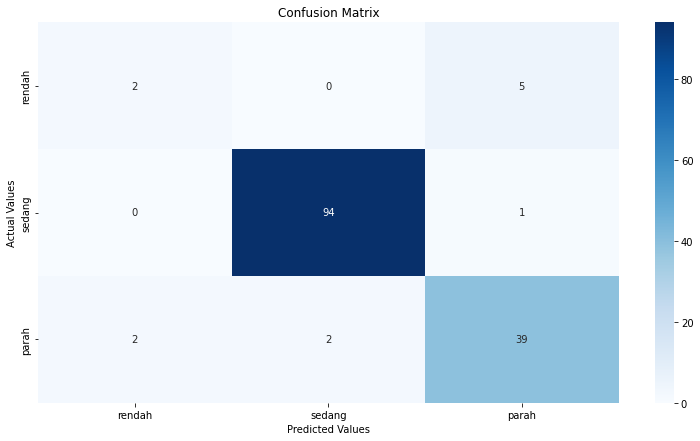

In [39]:
cm=confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['rendah', 'sedang', 'parah']))

              precision    recall  f1-score   support

      rendah       0.70      0.27      0.39        26
      sedang       0.99      0.99      0.99       294
       parah       0.83      0.95      0.89       115

    accuracy                           0.94       435
   macro avg       0.84      0.74      0.75       435
weighted avg       0.93      0.94      0.93       435



In [2]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

NameError: name 'gnb' is not defined

In [26]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9121


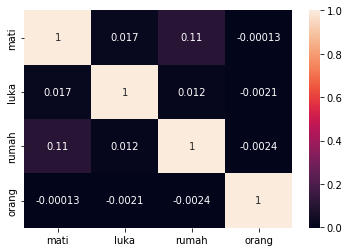

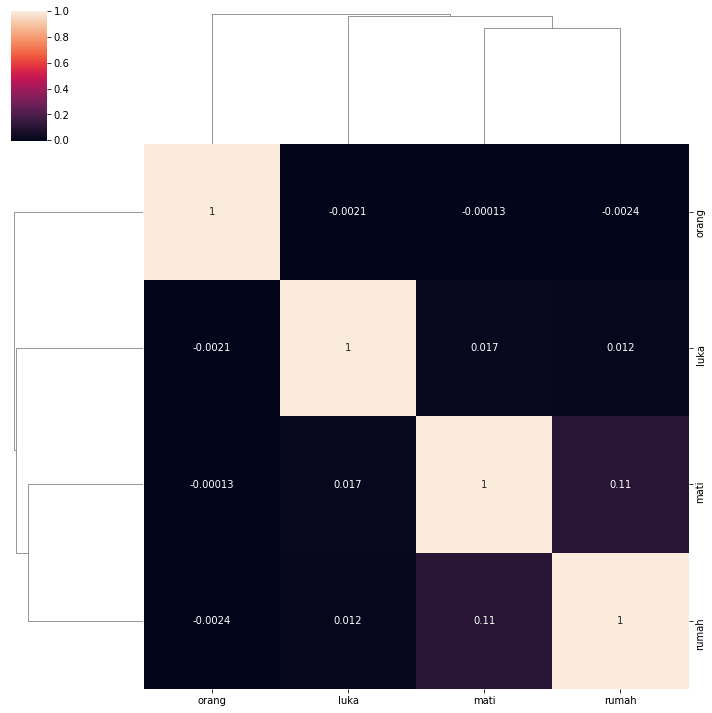

In [392]:
# Model improvements
import seaborn as sns

# calculate the correlations
correlations = df.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)